# Decision trees
Decision trees in Python
Lecture is on udemy.com

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df = pd.read_csv('kyphosis.csv')
plt.style.use("ggplot")

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


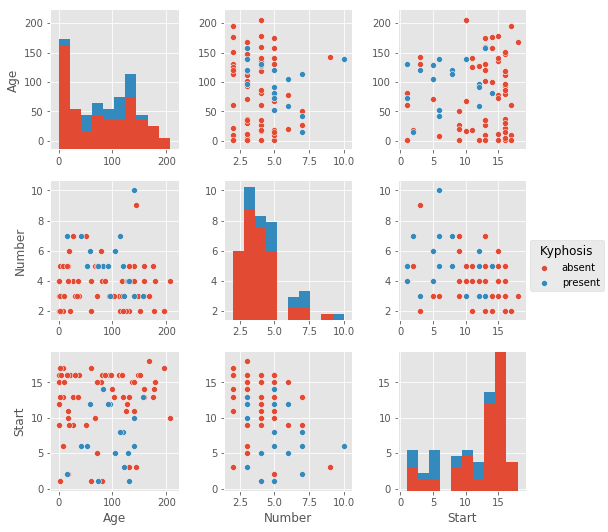

In [12]:
sns.pairplot(df,hue='Kyphosis')

In [56]:
from sklearn.cross_validation import train_test_split

In [60]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
Age       81 non-null int64
Number    81 non-null int64
Start     81 non-null int64
dtypes: int64(3)
memory usage: 2.0 KB


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# X_train

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dtree = DecisionTreeClassifier()

In [37]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
predictions = dtree.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))

[[17  1]
 [ 4  3]]


             precision    recall  f1-score   support

     absent       0.81      0.94      0.87        18
    present       0.75      0.43      0.55         7

avg / total       0.79      0.80      0.78        25



In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(n_estimators=200)

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))
print("\n")
print(classification_report(y_test,rfc_pred))

[[17  1]
 [ 6  1]]


             precision    recall  f1-score   support

     absent       0.74      0.94      0.83        18
    present       0.50      0.14      0.22         7

avg / total       0.67      0.72      0.66        25



In [48]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

## Visualizing decision trees

In [53]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

In [55]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
# Image(graph[0].create_png())

You have to download Graphviz for this to work.